In [ ]:
XLABEL = "Years"
YLABEL = "ID (mm)"
TITLE = "Icing Days"
FILE_PATH = "id.csv"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Mount Google Drive to access files (if your CSV file is in Google Drive)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the CSV file into a pandas DataFrame
file_path = "/content/drive/MyDrive/GMB/" + FILE_PATH  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

In [ ]:
# Assuming you have a column named 'X' and another column named 'Y'
x_values = df['a'][0:61]
y_values_a = df['c'][0:61]
y_values_b = df['b'][0:61]

In [ ]:
print("from ", end="")
print(list(x_values)[0], end="")
print(" to ", end="")
print(list(x_values).pop())

from 1950 to 2010


In [ ]:
def numbers_ending_with_zero(input_list):
    """
    Filter numbers from the input list that end with zero.

    Parameters:
    - input_list (list): List of numbers.

    Returns:
    - list: List containing numbers ending with zero.
    """
    return [num for num in input_list if num % 10 == 0]

# Example usage:
x_values_on_graph = numbers_ending_with_zero(list(x_values))


print(x_values_on_graph)

[1950, 1960, 1970, 1980, 1990, 2000, 2010]


In [ ]:
vertical_lines = [1955, 1969, 1985, 1997, 2000, 2010]

In [ ]:
def get_y_value_for_year(year, x_values, y_values):

    # Ensure that x_values are sorted
    sorted_points = sorted(zip(x_values, y_values))
    sorted_x_values, sorted_y_values = zip(*sorted_points)

    # Find the index of the year in the sorted_x_values
    try:
        index = sorted_x_values.index(year)
        y_value = sorted_y_values[index]
        return y_value
    except ValueError:
        print(f"No data for the year {year}.")
        return None

In [ ]:
# Sample data (replace these with your actual data)
years = np.arange(1961, 2011).reshape(-1, 1)  # Years from 1955 to 2010
precipitation = np.array(np.nan_to_num(y_values_a[11:], nan=0))  # Replace with your precipitation values
# Create linear regression model
model = LinearRegression()

# Fit the model for the years 1955 to 2010
model.fit(years, precipitation)

# Print the equation of the regression line
slope = model.coef_[0]
intercept = model.intercept_

equation = f"y = {slope:.2f}x + {intercept:.2f}"
print("Regression Equation:", equation)

Regression Equation: y = -0.00x + 1.25


In [ ]:
y_values_a[11:]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
56    0.07
57    0.09
58    0.10
59    0.10
60    0.09
Name: c, Length: 61, dtype: float64

In [ ]:
x_values[11:]

11    1961
12    1962
13    1963
14    1964
15    1965
16    1966
17    1967
18    1968
19    1969
20    1970
21    1971
22    1972
23    1973
24    1974
25    1975
26    1976
27    1977
28    1978
29    1979
30    1980
31    1981
32    1982
33    1983
34    1984
35    1985
36    1986
37    1987
38    1988
39    1989
40    1990
41    1991
42    1992
43    1993
44    1994
45    1995
46    1996
47    1997
48    1998
49    1999
50    2000
51    2001
52    2002
53    2003
54    2004
55    2005
56    2006
57    2007
58    2008
59    2009
60    2010
Name: a, dtype: int64

In [ ]:
# Calculate R-squared value
r_squared = model.score(years, precipitation)

# Print R-squared value
print("R-squared:", r_squared)

R-squared: 0.11514064934434898


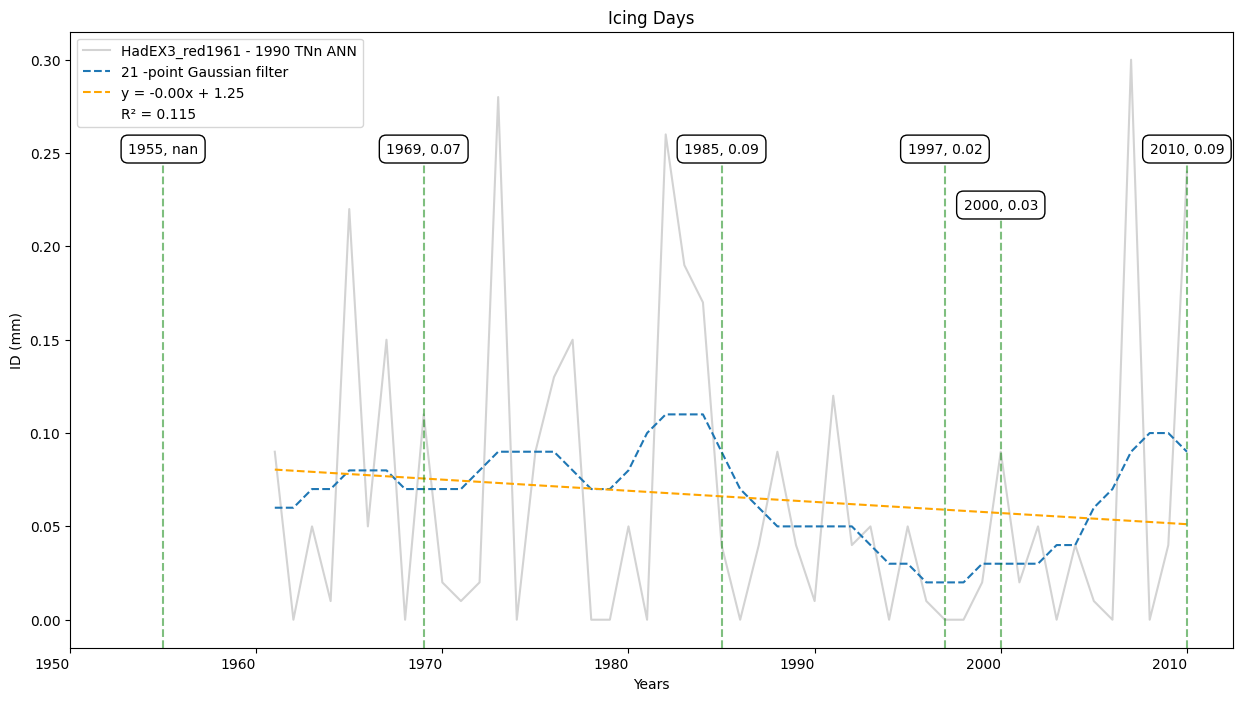

In [ ]:
# Create a figure with a specific size
plt.figure(figsize=(15, 8))  # Adjust width and height as needed


# Plot the data for 'Column_B'
plt.plot(x_values, y_values_b, label='HadEX3_red1961 - 1990 TNn ANN', color='#D3D3D3', linestyle='-')

# Plot the data
plt.plot(x_values, y_values_a, label='21 -point Gaussian filter', linestyle='--')



regression_line = model.predict(years)
regression_line
slope = model.coef_[0]
intercept = model.intercept_



# Ensure the regression line corresponds to the subset of x_values starting from 1961
x_values_for_regression = np.arange(1961, 2011).reshape(-1, 1)
regression_line_subset = model.predict(x_values_for_regression)

plt.plot(x_values_for_regression, regression_line_subset, label=equation, color='orange', linestyle='--')

plt.plot([], [], label=f"R\u00B2 = {round(r_squared, 3)}", color='white')



# Add labels and a title
plt.xlabel(XLABEL)
plt.ylabel(YLABEL)
plt.title(TITLE)

plt.xticks(x_values_on_graph, rotation=0, ha='right')  # Adjust rotation and spacing as needed

# Add a legend
plt.legend()

# Add vertical lines
boxes_hieght = 0.25

plt.axvline(x=1955, color='green', linestyle='--', alpha=0.5, ymax=0.8)
plt.text(1955, boxes_hieght, f'''{1955}, {get_y_value_for_year(1955, x_values, y_values_a)}''', color='black', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))


plt.axvline(x=1969, color='green', linestyle='--', alpha=0.5, ymax=0.8)
plt.text(1969, boxes_hieght, f'''{1969}, {get_y_value_for_year(1969, x_values, y_values_a)}''', color='black', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))


plt.axvline(x=1985, color='green', linestyle='--', alpha=0.5, ymax=0.8)
plt.text(1985, boxes_hieght, f'''{1985}, {get_y_value_for_year(1985, x_values, y_values_a)}''', color='black', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))


plt.axvline(x=1997, color='green', linestyle='--', alpha=0.5, ymax=0.8)
plt.text(1997, boxes_hieght, f'''{1997}, {get_y_value_for_year(1997, x_values, y_values_a)}''',  color='black', ha='center' , bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))


plt.axvline(x=2000, color='green', linestyle='--', alpha=0.5, ymax=0.7)
plt.text(2000, boxes_hieght - 0.02999, f'''{2000}, {get_y_value_for_year(2000, x_values, y_values_a)}''', color='black', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))


plt.axvline(x=2010, color='green', linestyle='--', alpha=0.5, ymax=0.8)
plt.text(2010, boxes_hieght, f'''{2010}, {get_y_value_for_year(2010, x_values, y_values_a)}''', color='black', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))


# Show the plot
plt.show()


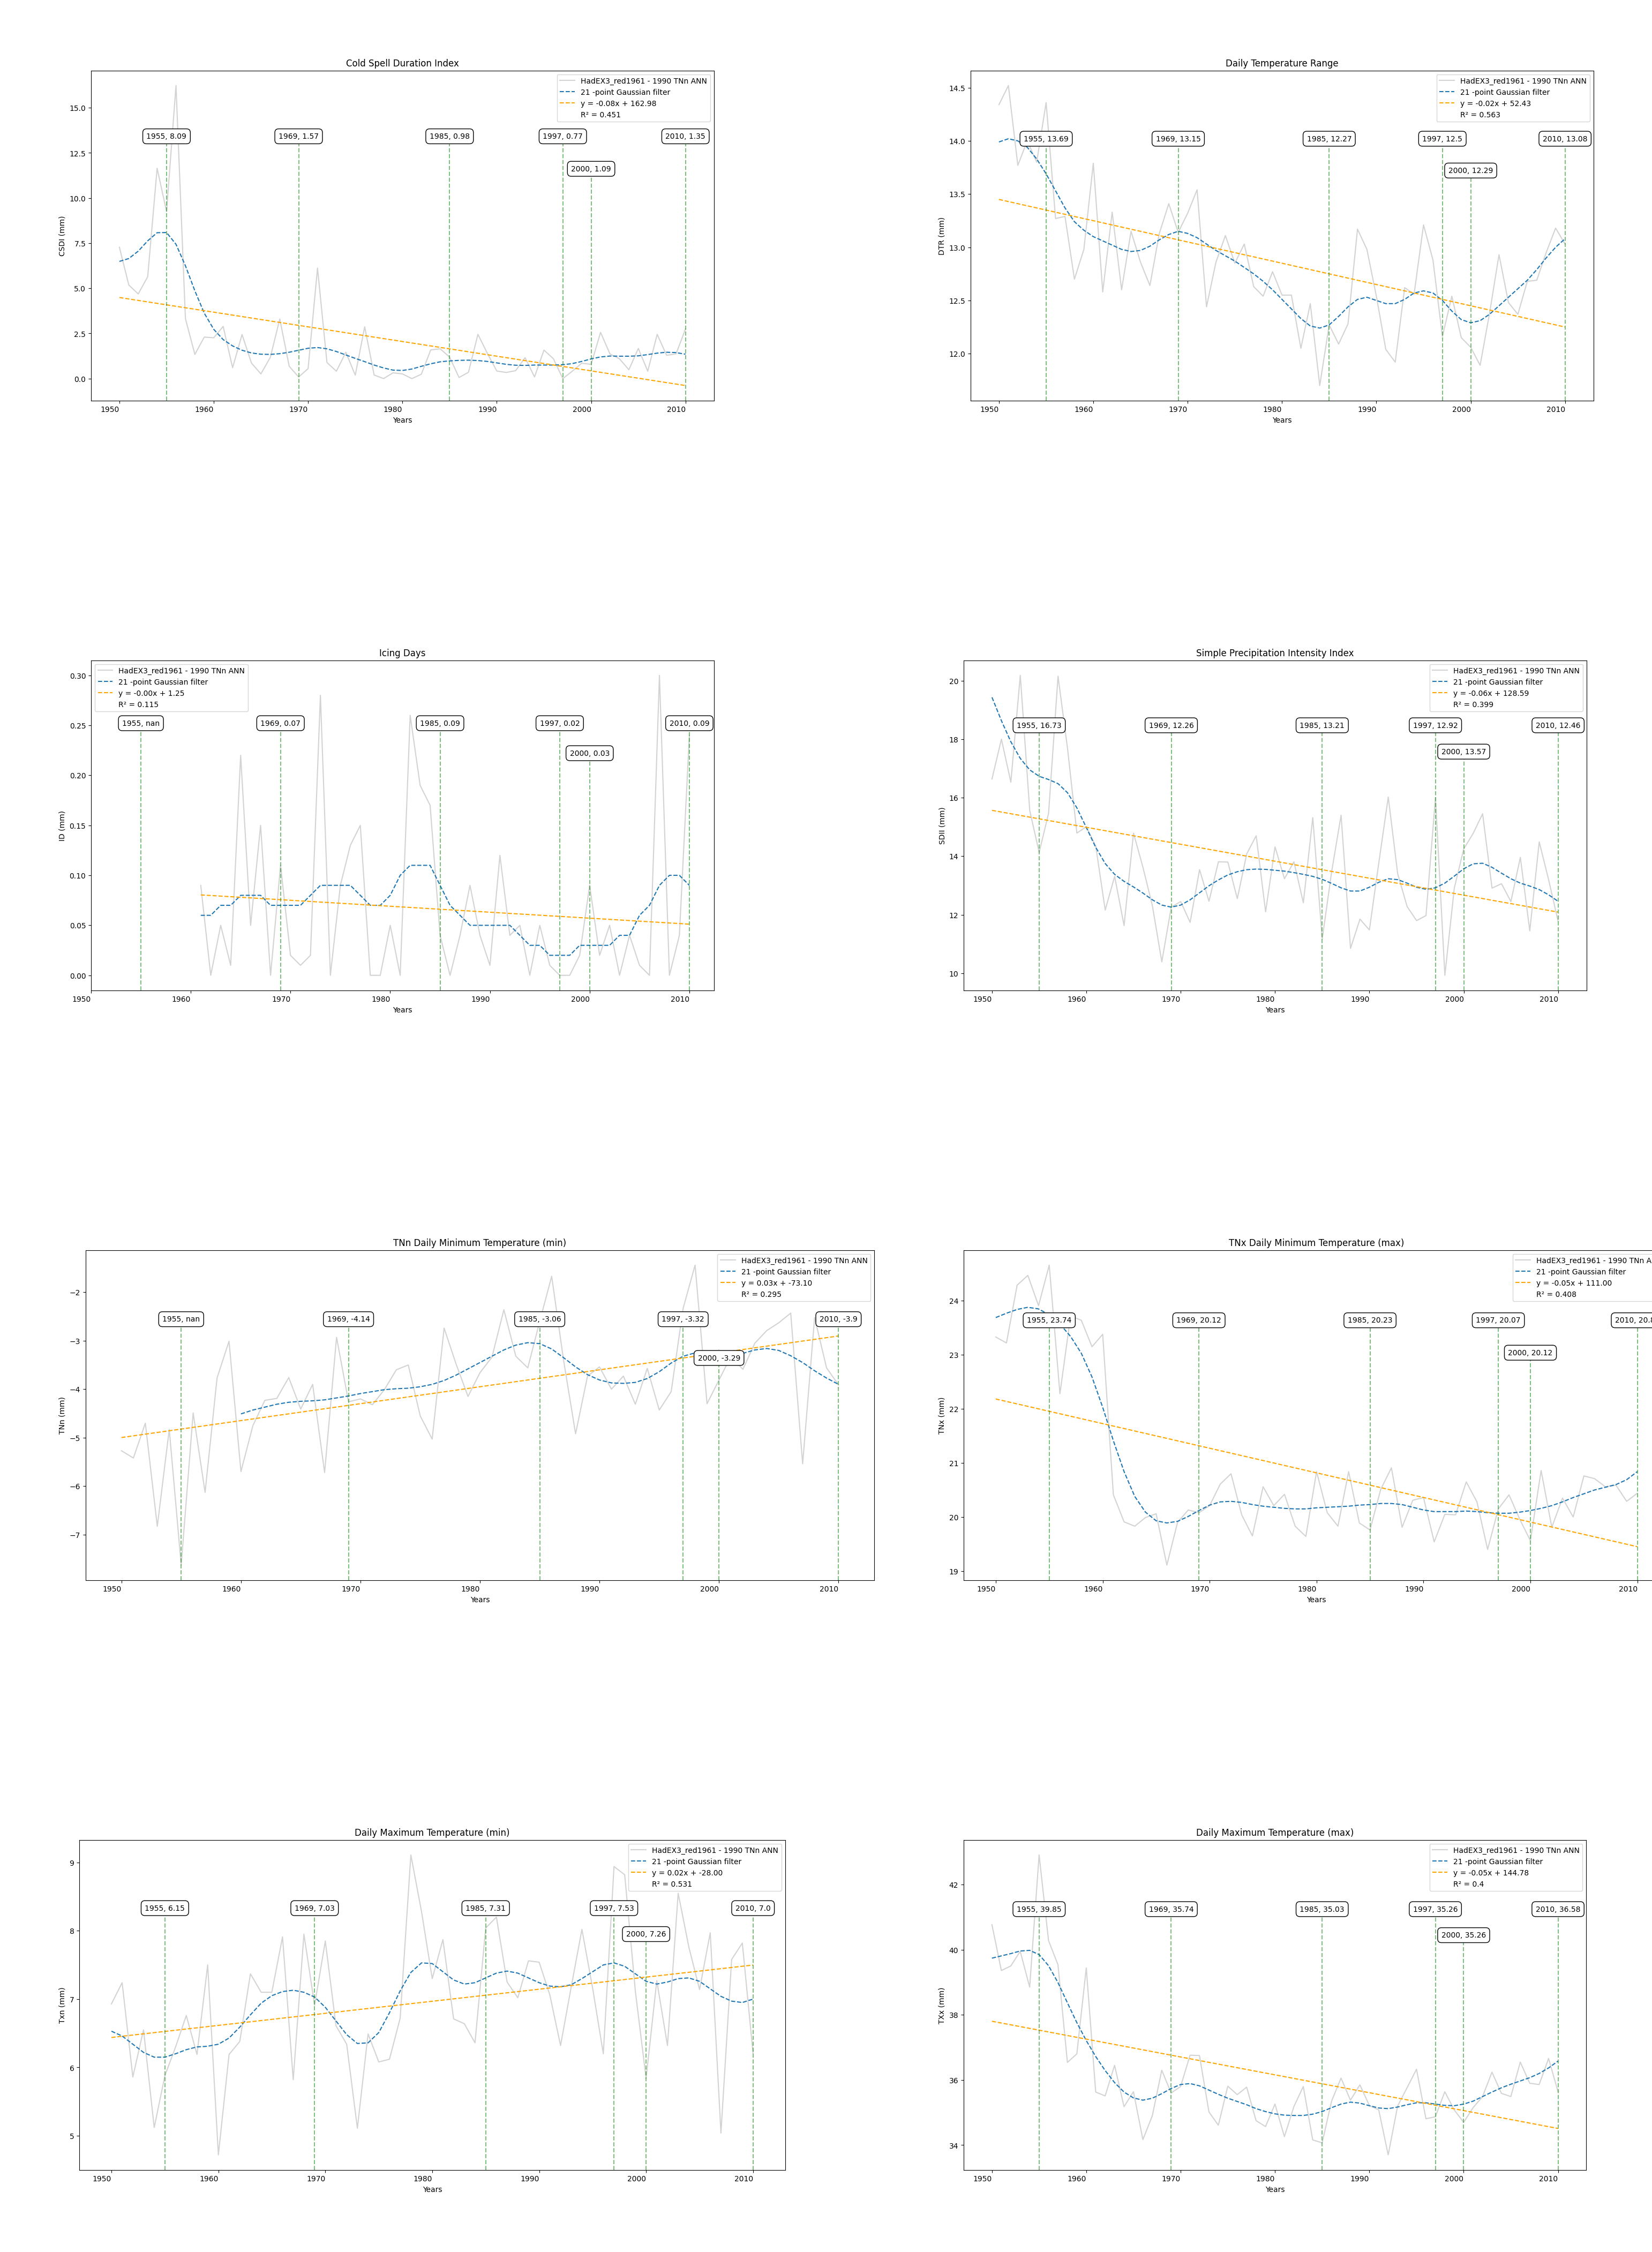

In [ ]:
from PIL import Image

# Open the images
img_path = "/content/drive/MyDrive/GMB/GMB_IMG/"

image1 = Image.open(img_path + 'CSDI.png')
image2 = Image.open(img_path + 'DTR.png')
image3 = Image.open(img_path + 'id.png')
image4 = Image.open(img_path + 'SDII.png')
image5 = Image.open(img_path + 'TNn.png')
image6 = Image.open(img_path + 'TNx.png')
image7 = Image.open(img_path + 'Txn.png')
image8 = Image.open(img_path + 'TXx.png')

# Function to add padding between images
def add_padding(image, padding_size):
    width, height = image.size
    new_width = width + padding_size
    new_height = height + padding_size
    new_image = Image.new('RGB', (new_width, new_height), (255, 255, 255))  # Set the background color to white

    # Paste the original image onto the padded image
    new_image.paste(image, (padding_size // 2, padding_size // 2))
    return new_image

# Set the padding size (adjust as needed)
padding_size = 200

# Add padding to each image
image1 = add_padding(image1, padding_size)
image2 = add_padding(image2, padding_size)
image3 = add_padding(image3, padding_size)
image4 = add_padding(image4, padding_size)
image5 = add_padding(image5, padding_size)
image6 = add_padding(image6, padding_size)
image7 = add_padding(image7, padding_size)
image8 = add_padding(image8, padding_size)

# Create a new blank image with a size that can accommodate all the images with padding
width = image1.width * 2 + padding_size
height = image1.height * 4 + padding_size * 3
collage = Image.new('RGB', (width, height), (255, 255, 255))  # Set the background color to white

# Paste the images onto the collage with padding
collage.paste(image1, (0, 0))
collage.paste(image2, (image1.width + padding_size, 0))
collage.paste(image3, (0, image1.height + padding_size))
collage.paste(image4, (image1.width + padding_size, image1.height + padding_size))
collage.paste(image5, (0, image1.height * 2 + padding_size * 2))
collage.paste(image6, (image1.width + padding_size, image1.height * 2 + padding_size * 2))
collage.paste(image7, (0, image1.height * 3 + padding_size * 3))
collage.paste(image8, (image1.width + padding_size, image1.height * 3 + padding_size * 3))

# Save the collage
collage